# **Project:** **Diabetes Dataset Classification**
- Author: Anam Jafar
- Dataset Source: Provided (Raw CSV file)
- Objective: Analyze patient data to predict the likelihood of diabetes based on health metrics using a supervised learning model.
- Start Date: 26-12-24
- Tools Used: Python (pandas, matplotlib, seaborn, scikit-learn)

#### **Provided Dataset Overview**
1. **Number of entries:** 77,000 rows
2. **Number of columns:** 10 columns
3. **Column details:**
   - **Patient_ID**: Unique identifier for each patient (Object/String).
   - **Age**: Patient's age in years (Integer).
   - **Gender**: Patient's gender (Male/Female) (String).
   - **BMI**: Body Mass Index (Float, contains missing values).
   - **Glucose_Level**: Blood glucose concentration (Float, contains missing values).
   - **Blood_Pressure**: Blood pressure levels (Float, contains missing values).
   - **Insulin**: Insulin levels (Float, contains missing values).
   - **Diabetes_Pedigree_Function**: A function that scores the likelihood of diabetes based on family history (Float).
   - **Pregnancies**: Number of times the patient has been pregnant (Integer).
   - **Outcome**: Target variable, indicates whether the patient has diabetes (1 = Yes, 0 = No) (Integer).

#### **Observations:**
1. Missing values exist in several columns: **BMI**, **Glucose_Level**, **Blood_Pressure**, and **Insulin**.
2. The dataset is primarily numeric, with one categorical column (**Gender**) and one unique identifier column (**Patient_ID**).
3. The target variable is **Outcome**, which makes this a classification problem.

#### **Metadata:**

| **Column Name**               | **Description**                                                                 | **Type**       | **Notes**                              |
|-------------------------------|-------------------------------------------------------------------------------|---------------|----------------------------------------|
| Patient_ID                    | Unique identifier for each patient                                             | Object (String)| Not used in analysis                   |
| Age                           | Age of the patient in years                                                    | Integer       | Useful for understanding patient demographics |
| Gender                        | Gender of the patient (Male/Female)                                            | Object (String)| Categorical, may need encoding         |
| BMI                           | Body Mass Index (a measure of body fat)                                        | Float         | Missing values present                 |
| Glucose_Level                 | Blood glucose levels                                                           | Float         | Missing values present, critical for diabetes |
| Blood_Pressure                | Blood pressure levels                                                          | Float         | Missing values present                 |
| Insulin                       | Insulin levels in the body                                                     | Float         | Missing values present, critical for diabetes |
| Diabetes_Pedigree_Function    | Score for diabetes likelihood based on family history                          | Float         | No missing values                      |
| Pregnancies                   | Number of pregnancies                                                          | Integer       | Useful for female patients             |
| Outcome                       | Target variable: 1 = Diabetic, 0 = Non-Diabetic                                | Integer       | Classification target                  |


 Step:1 import necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

In [39]:
df = pd.read_csv('raw_diabetes_data.csv')
df.head()

,Patient_ID,Age,Gender,BMI,Glucose_Level,Blood_Pressure,Insulin,Diabetes_Pedigree_Function,Pregnancies,Outcome
0,ID000001,56,Male,NaN,119.0,166.0,85.0,2.01,12,0
1,ID000002,69,Male,28.70,100.0,124.0,260.0,2.24,10,0
2,ID000003,46,Female,27.47,170.0,141.0,238.0,0.94,0,0
3,ID000004,32,Female,27.26,130.0,NaN,182.0,0.32,0,0
4,ID000005,60,Female,32.11,78.0,167.0,63.0,2.48,11,1


# Step 3: Basic inspection of the dataset

In [40]:
# Check for data types, non-null values, and memory usage
df.info()
'''df.info() helps us verify the data types,
column names, and the presence of missing values.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77000 entries, 0 to 76999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient_ID                  77000 non-null  object 
 1   Age                         77000 non-null  int64  
 2   Gender                      77000 non-null  object 
 3   BMI                         71871 non-null  float64
 4   Glucose_Level               71842 non-null  float64
 5   Blood_Pressure              71869 non-null  float64
 6   Insulin                     71860 non-null  float64
 7   Diabetes_Pedigree_Function  77000 non-null  float64
 8   Pregnancies                 77000 non-null  int64  
 9   Outcome                     77000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 5.9+ MB


'df.info() helps us verify the data types,\ncolumn names, and the presence of missing values.'

## Understand the data structure

In [41]:
# check no of rowsand column in the dataset
print('The no. of rows in a dataset are:', df.shape[0])
print('The no. of columns in a dataset are:', df.shape[1])

The no. of rows in a dataset are: 77000
The no. of columns in a dataset are: 10


In [42]:
# Identify missing values
df.isnull().sum()

Patient_ID                       0
Age                              0
Gender                           0
BMI                           5129
Glucose_Level                 5158
Blood_Pressure                5131
Insulin                       5140
Diabetes_Pedigree_Function       0
Pregnancies                      0
Outcome                          0
dtype: int64

df.duplicated().sum()

In [43]:
# rws before removing duplicate values
print("rows before removing duplicate values :", df.shape[0])

# remove duplicates
df = df.drop_duplicates()

# total rows after removing duplicate
print("rows after removing duplicate values :", df.shape[0])

rows before removing duplicate values : 77000
rows after removing duplicate values : 75000


# Trim white spaces in the cells

In [44]:
# remove space from categorical column
df["Gender"] = df["Gender"].str.strip()

## Handling Missing values

In [45]:
# calculate the percentage of missing values for each column
df.isnull().sum() / len(df) * 100

Patient_ID                    0.000000
Age                           0.000000
Gender                        0.000000
BMI                           6.666667
Glucose_Level                 6.666667
Blood_Pressure                6.666667
Insulin                       6.666667
Diabetes_Pedigree_Function    0.000000
Pregnancies                   0.000000
Outcome                       0.000000
dtype: float64

### Check Normal Distribution with Histograms
1. Use histograms and KDE to visually inspect the distribution of the data.
2. Bell-shaped curve → Use mean for imputation.
3. Skewed curve → Use median for imputation.

In [46]:
# Columns with missing values
columns_to_check = ['BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin ']

# Plot histogram + KDE for each 

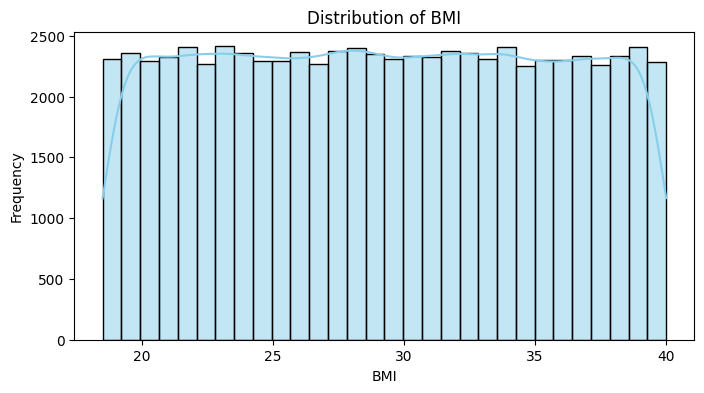

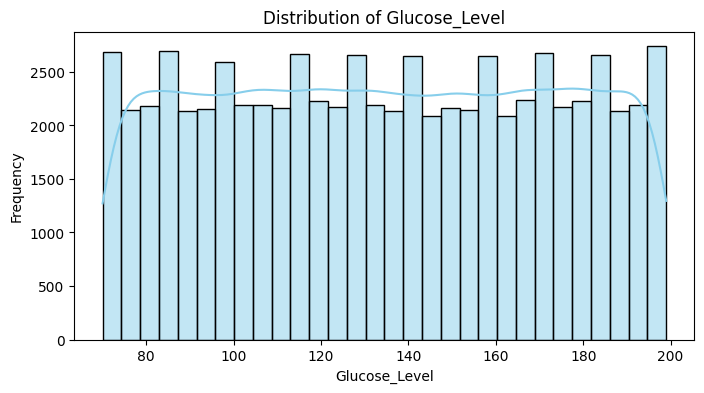

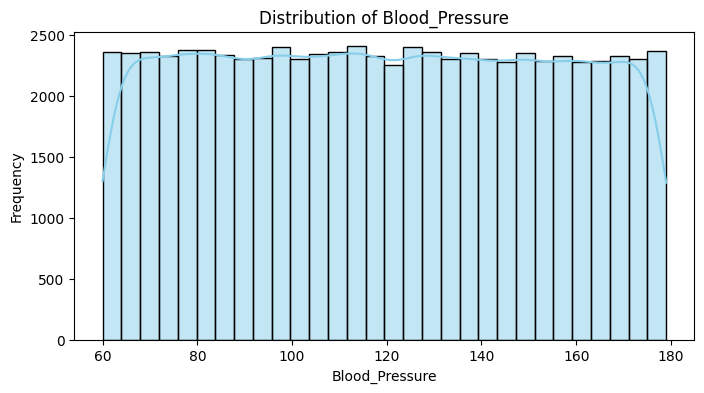

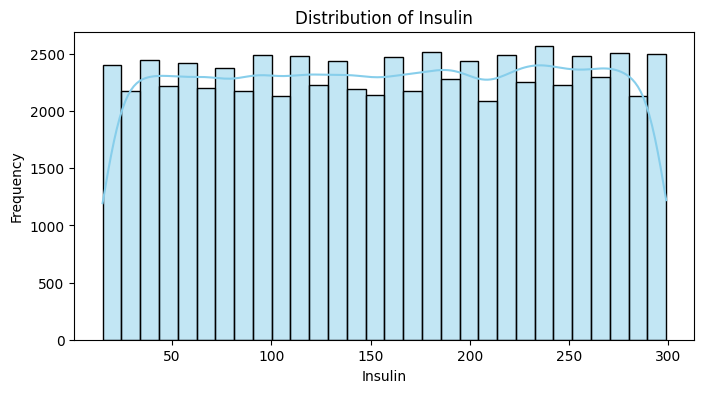

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns with missing values
columns_to_check = ['BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin']

# Plot Histogram + KDE for each column
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    # To see the true distribution, we need to drop missing values before plotting.
    sns.histplot(df[column].dropna(), kde=True, color='skyblue', bins=30)  # Histogram with KDE overlay
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

3. For a numerical check, use `skew()`:
   - Skewness ≈ 0: Normal distribution → Use mean.
   - Skewness > 0 or < 0: Skewed distribution → Use median.

In [48]:
# Check skewness for each column
print("Skewness of Columns:")
for column in columns_to_check:
    skewness = df[column].dropna().skew()
    print(f"{column}: Skewness = {skewness:.2f}")

Skewness of Columns:
BMI: Skewness = 0.00
Glucose_Level: Skewness = -0.00
Blood_Pressure: Skewness = 0.01
Insulin: Skewness = -0.01


## Impute Missing Values with Mean

- Since the data is normally distributed (confirmed by skewness ≈ 0), the mean is the most representative central value.

In [49]:
cols_to_impute = ['BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin']

# Impute missing values with the mean for each column

for col in cols_to_impute:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\840919795.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


- Explanation of the code:
    - _cols_to_impute:_ 
 This is a list of column names where we want to fill in missing values.
  - _for col in cols_to_impute:_
    This loop goes through each column name in the list.
  - _df[col].fillna(df[col].mean(), inplace=True):_ 
   For each column, this line calculates the mean of the column and replaces any missing values (NaN) with that mean. 
  - _The inplace=True_ :
 argument means that the changes are made directly to the original DataFrame (df).

In [50]:
# verify the changes
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Glucose_Level                 0
Blood_Pressure                0
Insulin                       0
Diabetes_Pedigree_Function    0
Pregnancies                   0
Outcome                       0
dtype: int64

# Exploratory Data Analysis (EDA)

## Step 1 : Understand the overall dataset

-  How to Interpret `df.describe()`:
1. Check for anomalies (unrealistic `min`, `max` values).
2. Look at `mean` and `std` to understand data spread.
3. Identify potential outliers by comparing `min/max` to quartiles.

In [51]:
# statistical  summary of numerical columns
df.describe()

,Age,BMI,Glucose_Level,Blood_Pressure,Insulin,Diabetes_Pedigree_Function,Pregnancies,Outcome
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,48.542307,29.234548,134.596171,119.278800,157.774414,1.295869,7.005067,0.347853
std,17.892669,5.990623,36.312303,33.471504,79.486420,0.692298,4.329146,0.476292
min,18.000000,18.500000,70.000000,60.000000,15.000000,0.100000,0.000000,0.000000
25%,33.000000,24.240000,104.000000,91.000000,92.000000,0.697500,3.000000,0.000000
50%,48.000000,29.234548,134.596171,119.278800,157.774414,1.290000,7.000000,0.000000
75%,64.000000,34.180000,165.000000,147.000000,225.000000,1.900000,11.000000,1.000000
max,79.000000,40.000000,199.000000,179.000000,299.000000,2.500000,14.000000,1.000000


##### How to Interpret `value_counts()`:
1. For categorical columns:
   - Check for balance (e.g., Male vs. Female).
   - Balanced data means no action is needed.

In [52]:
# Check for balance
df.value_counts('Gender')

Gender
Male      37565
Female    37435
Name: count, dtype: int64

In [53]:
#For target (`Outcome`):
   #- Check for imbalance.
df.value_counts('Outcome')

Outcome
0    48911
1    26089
Name: count, dtype: int64

. Key Observations:
   - `Insulin`: High variability (check visually for outliers).
   - `Outcome`: Imbalanced target variable (34% diabetics, 66% non-diabetics).


# Data Visualization

## **Step 2: Analyze the Target Variable (`Outcome`)**

- Interpretation:
   - Tall bar = more data in that class.
   - Equal bar heights = balanced dataset.
   - If imbalance exists, note it for model handling.

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\1442214925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette = 'viridis') # x is the column,  'Outcome'


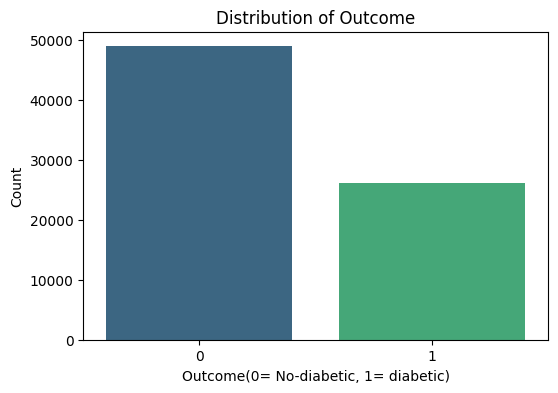

In [54]:
# Plot the count plot for outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette = 'viridis') # x is the column,  'Outcome'
plt.title('Distribution of Outcome')
plt.xlabel('Outcome(0= No-diabetic, 1= diabetic)')
plt.ylabel('Count')
plt.show()


## Step 3: Univariate Analysis
- Why Are We Doing This?
    - To explore the distribution of each numerical feature.
    - To detect patterns, ranges, and potential outliers.
    - Helps us decide whether we need to preprocess the data further (e.g., scaling, removing outliers).

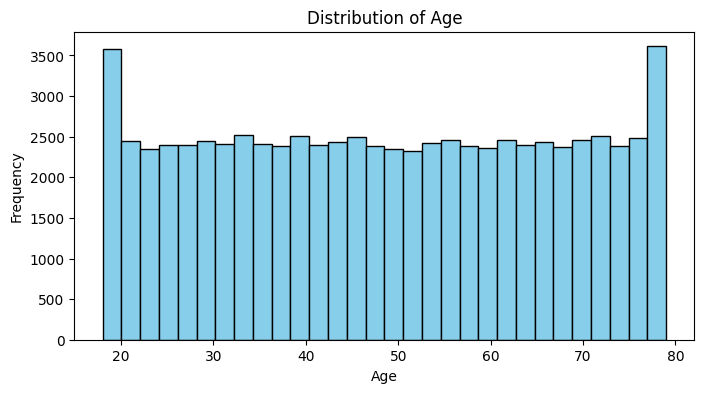

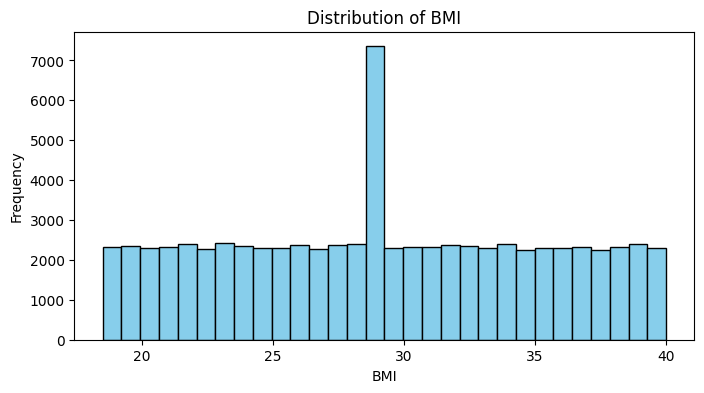

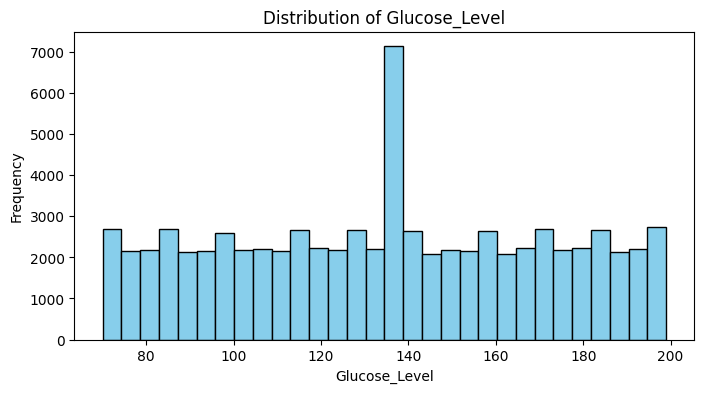

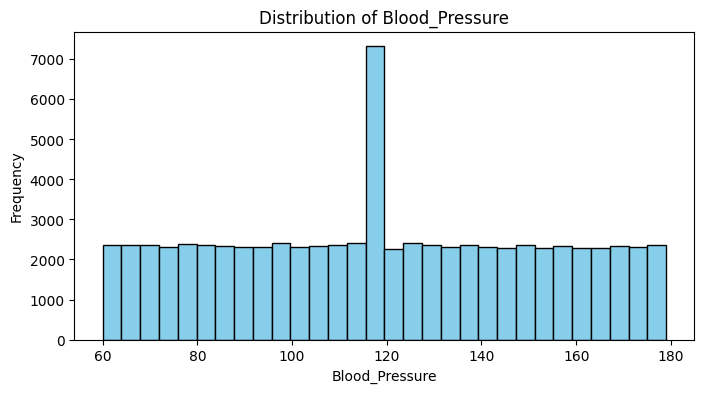

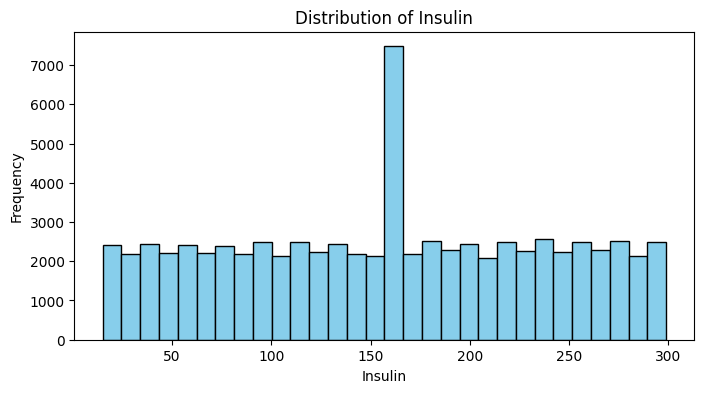

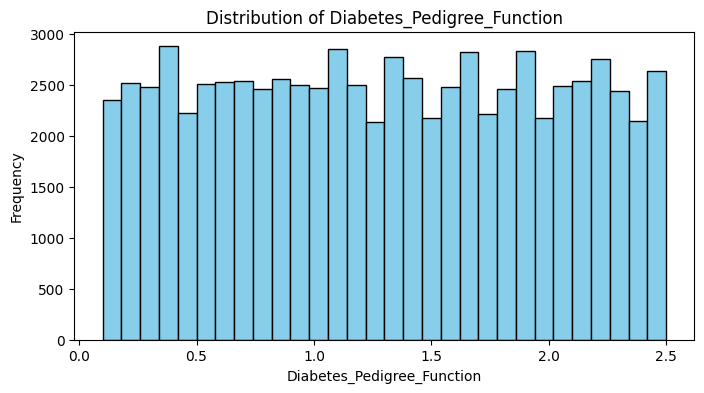

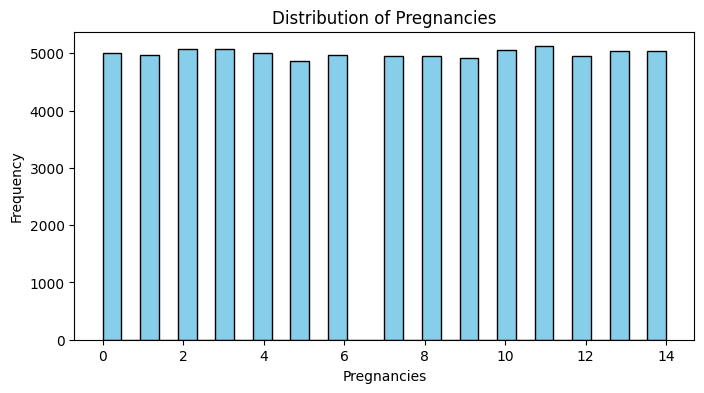

In [55]:
#Plot Histograms for Numerical Features
# Plot histograms for all numerical features
numerical_features = ['Age', 'BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin', 
                      'Diabetes_Pedigree_Function', 'Pregnancies']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

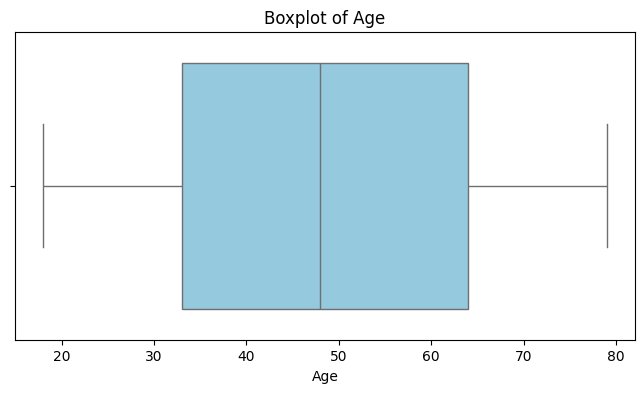

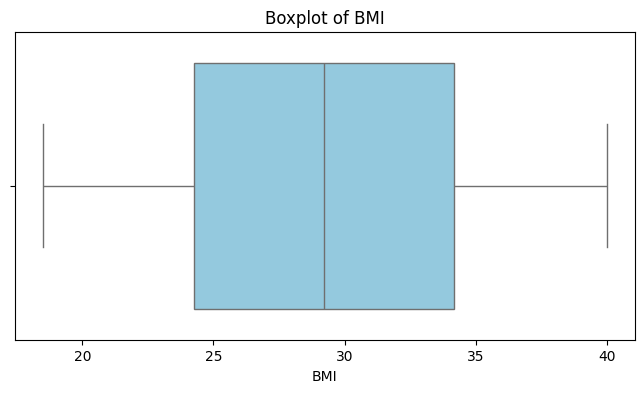

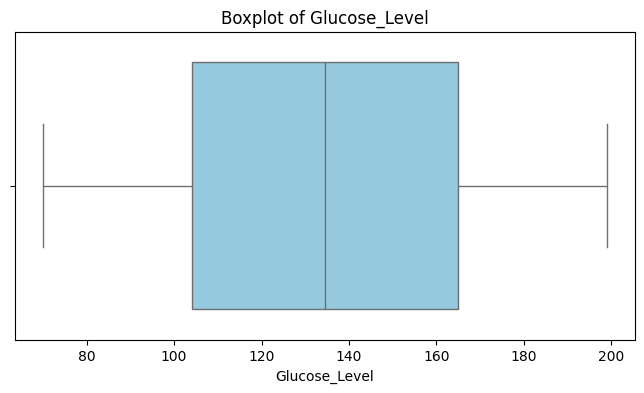

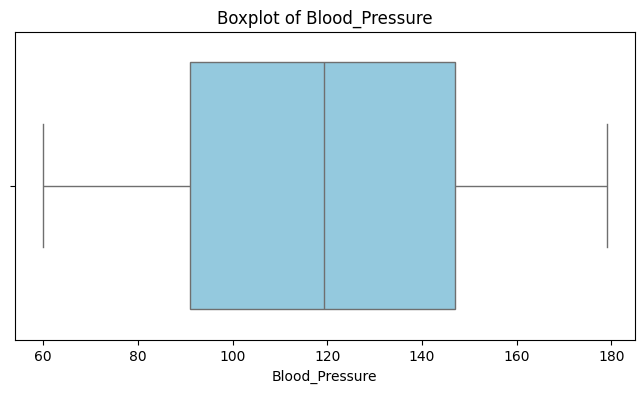

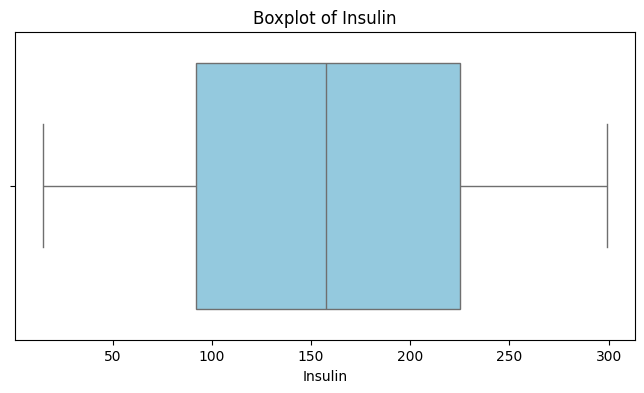

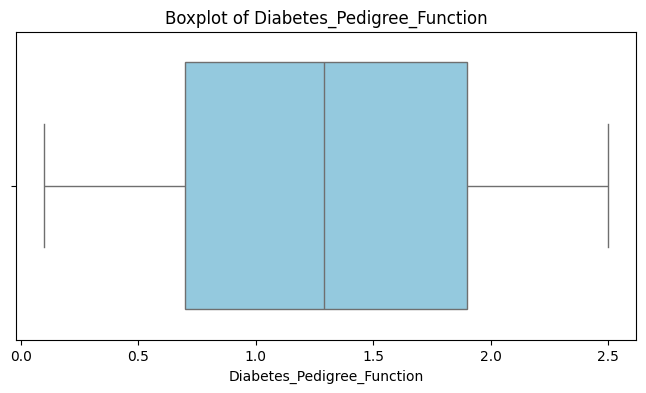

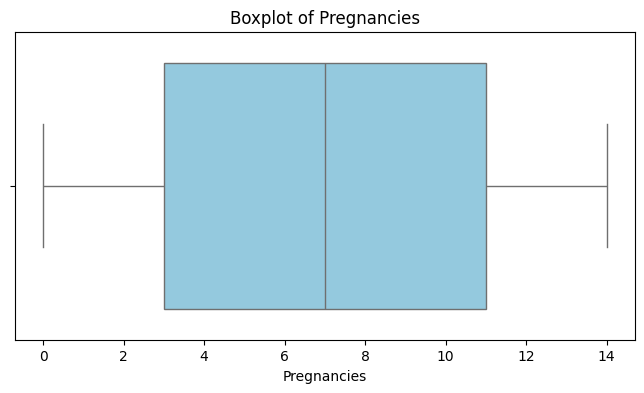

In [56]:
# plot boxplot to check outliers
# Plot boxplots for all numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

#### **Step 4: Bivariate Analysis (Feature Relationships with `Outcome`)**
**Why?**
- To understand how each feature correlates with the target (`Outcome`).
- Helps identify important features for the model.

**What to do:**
1. Use **boxplots** or **violin plots** for continuous features (e.g., compare `BMI` distributions for `Outcome = 0` vs. `Outcome = 1`).
2. Use **grouped bar plots** for categorical features (e.g., compare `Gender` proportions for `Outcome`).

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\3169422551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)


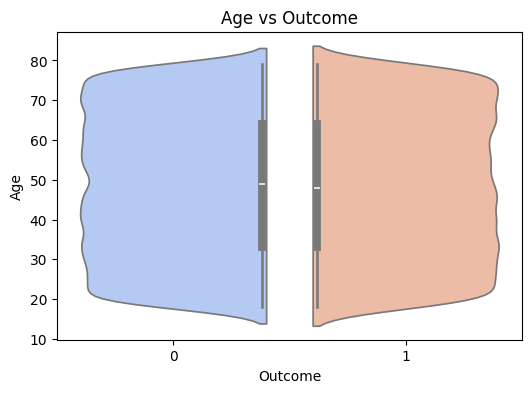

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\3169422551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)


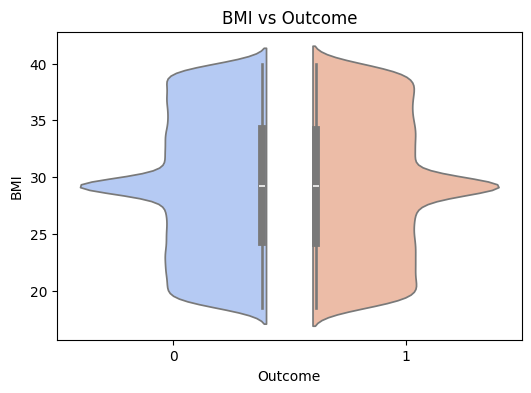

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\3169422551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)


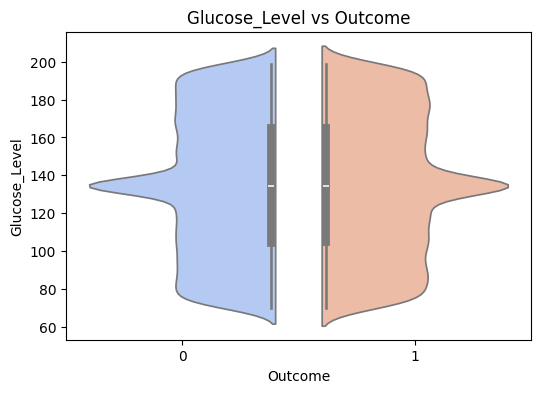

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\3169422551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)


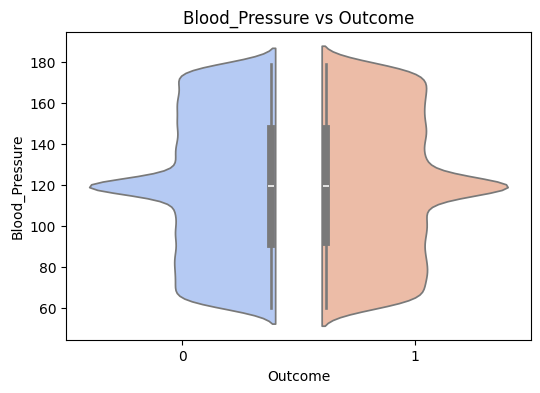

C:\Users\ADV\AppData\Local\Temp\ipykernel_12696\3169422551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)


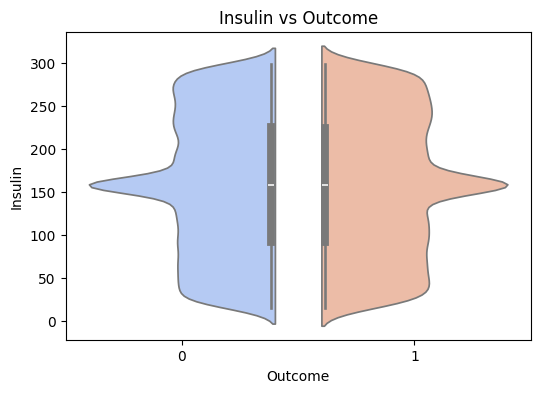

In [57]:
# Violin Plots for Numerical Features and Outcome
features = ["Age", "BMI", "Glucose_Level", "Blood_Pressure", "Insulin"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x="Outcome", y=feature, palette="coolwarm", split=True)
    plt.title(f"{feature} vs Outcome")
    plt.show()

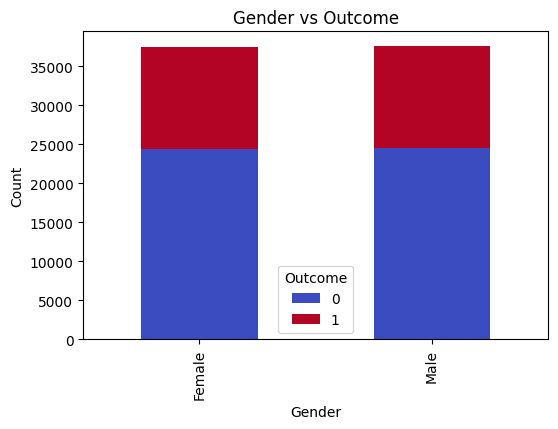

In [58]:
# Grouped Bar Plot for Gender and Outcome
gender_outcome = df.groupby(["Gender", "Outcome"]).size().unstack()
gender_outcome.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="coolwarm")
plt.title("Gender vs Outcome")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### **Step 5: Correlation Analysis (Relationships Between Features)**
**Why?**
- To identify how strongly features are related to each other (collinearity).
- Helps decide whether any features are redundant.

In [59]:
df.dtypes

Patient_ID                     object
Age                             int64
Gender                         object
BMI                           float64
Glucose_Level                 float64
Blood_Pressure                float64
Insulin                       float64
Diabetes_Pedigree_Function    float64
Pregnancies                     int64
Outcome                         int64
dtype: object

In [60]:
# Drop non-numerical columns (ID or outcome)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

#  Calculate correlation matrix
correlation_matrix = numerical_df.corr()

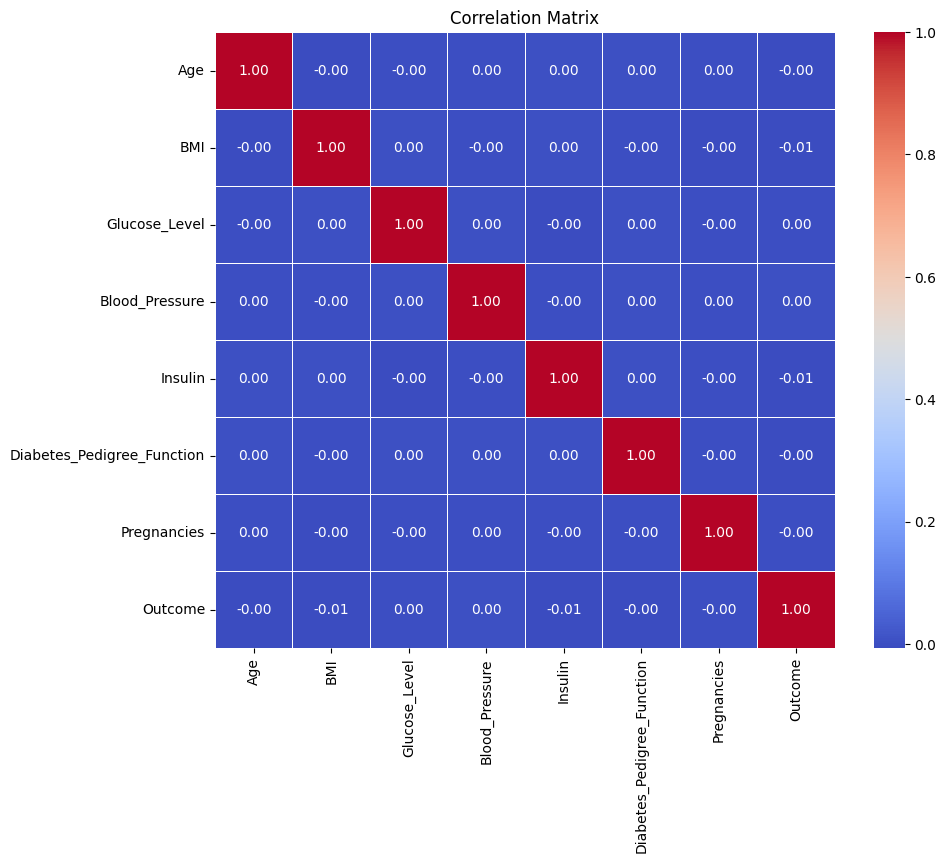

In [61]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### **3. Observations from the Heatmap:**

1. **Feature Relationships with `Outcome`:**
   - Most features have near-zero correlation with `Outcome` except for very weak relationships (e.g., `BMI` at `-0.01`, etc.).

2. **Feature Relationships with Each Other:**
   - No features are strongly correlated with each other (all correlations near `0`).
   - This means we don't have redundancy (e.g., two features providing the same information).

3. **Insights:**
   - The dataset appears well-prepared in terms of multicollinearity.
   - We need to rely on model-specific methods or feature selection techniques to better understand the importance of each feature.

## Data Preprocessing

In [62]:
''' Step 1: Drop the 'ID' column from the dataset'''
# 'ID' is a unique identifier and does not contribute to predicting the target.
df.drop(columns=['Patient_ID'], inplace=True)

In [63]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin',
       'Diabetes_Pedigree_Function', 'Pregnancies', 'Outcome'],
      dtype='object')

In [64]:
''' Step 2: Encode the 'Gender' column'''
# Convert 'Male' to 1 and 'Female' to 0 

# Check the unique values in the 'Gender' column before encoding
print("Unique values in 'Gender' before encoding:")
print(df['Gender'].unique())

Unique values in 'Gender' before encoding:
['Male' 'Female']


In [65]:
# Perform label encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

'''map(): Maps each unique category to a numeric value (e.g., Male -> 1, Female -> 0).'''

# Confirm the first few rows of the dataset
print("\nFirst few rows of the dataset after encoding:")
print(df.head())


First few rows of the dataset after encoding:
   Age  Gender        BMI  Glucose_Level  Blood_Pressure  Insulin  \
0   56       1  29.234548          119.0        166.0000     85.0   
1   69       1  28.700000          100.0        124.0000    260.0   
2   46       0  27.470000          170.0        141.0000    238.0   
3   32       0  27.260000          130.0        119.2788    182.0   
4   60       0  32.110000           78.0        167.0000     63.0   

   Diabetes_Pedigree_Function  Pregnancies  Outcome  
0                        2.01           12        0  
1                        2.24           10        0  
2                        0.94            0        0  
3                        0.32            0        0  
4                        2.48           11        1  


In [66]:
'''Step 3: Feature Scaling
Scaling ensures that all numerical features are on the same scale.
 This is especially useful for distance-based algorithms (e.g., SVM, KNN).'''

'Step 3: Feature Scaling\nScaling ensures that all numerical features are on the same scale.\n This is especially useful for distance-based algorithms (e.g., SVM, KNN).'

In [67]:
from sklearn.preprocessing import StandardScaler

# Step 3: Scale the numerical features
# Select numerical columns (excluding 'Outcome' which is the target)
numerical_features = ['Age', 'BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin', 
                      'Diabetes_Pedigree_Function', 'Pregnancies']

# Initialize the scaler
scaler = StandardScaler()
'''StandardScaler: Scales the data so it has a mean of 0 and a standard deviation of 1'''

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
'''We apply scaling only to numerical features (not the Outcome or Gender columns'''

# Check the scaled features (first few rows)
print("\nFirst few rows of scaled numerical features:")
print(df[numerical_features].head())



First few rows of scaled numerical features:
        Age       BMI  Glucose_Level  Blood_Pressure   Insulin  \
0  0.416804  0.000000      -0.429504        1.395859 -0.915564   
1  1.143364 -0.089231      -0.952746        0.141052  1.286085   
2 -0.142087 -0.294554       0.974988        0.648950  1.009306   
3 -0.924536 -0.329609      -0.126574        0.000000  0.304778   
4  0.640361  0.479995      -1.558605        1.425736 -1.192343   

   Diabetes_Pedigree_Function  Pregnancies  
0                    1.031543     1.153800  
1                    1.363772     0.691812  
2                   -0.514044    -1.618128  
3                   -1.409617    -1.618128  
4                    1.710445     0.922806  


# Feature Engineering

In [68]:
# Step 2: Create new features

# (a) Age Group
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)


In [69]:
# (b) BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

In [70]:
# (c) Interaction Features
df['BMI_Glucose'] = df['BMI'] * df['Glucose_Level']
df['Pregnancy_Age_Ratio'] = df['Pregnancies'] / (df['Age'] + 1e-6)  # Add small constant to avoid division by zero

# Check new features
print("\nFirst few rows of new features:")
print(df[['Age_Group', 'BMI_Category', 'BMI_Glucose', 'Pregnancy_Age_Ratio']].head())



First few rows of new features:
  Age_Group BMI_Category  BMI_Glucose  Pregnancy_Age_Ratio
0     Young  Underweight    -0.000000             2.768197
1     Young  Underweight     0.085015             0.605066
2     Young  Underweight    -0.287186            11.388337
3     Young  Underweight     0.041720             1.750208
4     Young  Underweight    -0.748123             1.441068


In [71]:
# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Verify the encoded columns
print("Encoded feature columns:")
print(X_encoded.columns)

Encoded feature columns:
Index(['Age', 'Gender', 'BMI', 'Glucose_Level', 'Blood_Pressure', 'Insulin',
       'Diabetes_Pedigree_Function', 'Pregnancies', 'BMI_Glucose',
       'Pregnancy_Age_Ratio'],
      dtype='object')


##  Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns and define features/target
X = df.drop(columns=['Outcome'])   # drop target
y = df['Outcome']  # Target variable

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


# Print shapes to verify split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (60000, 10)
Testing features shape: (15000, 10)
Training target shape: (60000,)
Testing target shape: (15000,)


## Train and Evaluate

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.5054666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.51      0.57      9782
           1       0.35      0.50      0.41      5218

    accuracy                           0.51     15000
   macro avg       0.50      0.50      0.49     15000
weighted avg       0.55      0.51      0.52     15000

ROC-AUC Score: 0.5061840456172229


In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the SMOTE data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_proba))

Random Forest Accuracy: 0.6006

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73      9782
           1       0.36      0.19      0.25      5218

    accuracy                           0.60     15000
   macro avg       0.51      0.50      0.49     15000
weighted avg       0.55      0.60      0.56     15000

Random Forest ROC-AUC Score: 0.5038214740993363


# Final Project Summary: Diabetes Classification

### 1. Objective
The goal of this project was to classify whether a patient is diabetic (`Outcome = 1`) or non-diabetic (`Outcome = 0`) based on health metrics like BMI, Glucose Level, and Insulin.

---

### 2. Steps Taken
1. **Data Preprocessing**:
   - Removed irrelevant columns (`ID`).
   - Encoded categorical features like `Gender` and `Age_Group`.
   - Scaled numerical features for consistency.

2. **Feature Engineering**:
   - Created interaction terms like `BMI * Glucose_Level` and `Pregnancies / Age`.
   - Grouped continuous variables (e.g., `Age` into `Age_Group`).

3. **Modeling**:
   - Used a **Random Forest Classifier** to predict diabetes.
   - Addressed class imbalance using SMOTE for the training set.

---

### 3. Model Performance
#### Random Forest Results:
- **Accuracy**: 60.06%
- **Precision (Class 1)**: 36%
- **Recall (Class 1)**: 19%
- **F1-Score (Class 1)**: 25%
- **ROC-AUC Score**: 50.38%

---

### 4. Insights
- **Strengths**:
  - The model performs well for the majority class (`Outcome = 0`).
  - Random Forest can handle non-linear relationships effectively.

- **Weaknesses**:
  - Struggles with the minority class (`Outcome = 1`), leading to low recall.
  - Imbalanced data limits the model's ability to generalize for diabetics.

---

### 5. Limitations and Next Steps
1. **Class Imbalance**:
   - More advanced methods like oversampling (e.g., SMOTE) or using weighted loss functions can improve minority class performance.

2. **Feature Engineering**:
   - Explore additional transformations or interaction terms to enhance predictive power.

3. **Model Selection**:
   - While Random Forest is robust, trying Gradient Boosting or Logistic Regression with fine-tuning may improve results.

---

### 6. Conclusion
The project demonstrated the use of Random Forest for diabetes prediction, achieving a balanced accuracy of 60.06%. While the model works well for non-diabetic cases, future work should focus on improving predictions for diabetic patients.